In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [2]:
# bin - dec (no sign)

def bin_dec(x):         # input must be a string     
    l = len(x)
    b = [int(x[j])*2**(l-j-1) for j in range(0,l)]
    b = np.sum(b)
    return(b)

In [3]:
bin_dec("01110")

14

In [4]:
# dec - bin (no sign)

def dec_bin(x):
    s = ""
    while x != 0:
        s = s + str(x%2)
        x = int(x/2)
    return(s[::-1])

In [5]:
dec_bin(8)

'1000'

In [6]:
# dec - hex (no sign)

def dec_hex(x):
    l = "0123456789ABCDEF"
    s = ""
    if x <= 15:
        return(l[x])
    else:
        while x != 0:
            s = s + l[x%16]
            x = int(x/16)
        return(s[::-1])

In [7]:
dec_hex(2620)

'A3C'

In [8]:
# hex - dec (no sign)

def hex_dec(x):     # input must be a string
    l = len(x)
    x = x[::-1]
    h = 0
    for i in range(l):
        if x[i] == "A":
            h = h + 10*16**i
        elif x[i] == "B":
            h = h + 11*16**i
        elif x[i] == "C":
            h = h + 12*16**i
        elif x[i] == "D":
            h = h + 13*16**i
        elif x[i] == "E":
            h = h + 14*16**i
        elif x[i] == "F":
            h = h + 15*16**i
        else:
            h = h + int(x[i])*16**i
    return(h)

In [9]:
hex_dec("28A")

650

2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [10]:
def word_float(x):  # input must be a string
    if len(x) != 32:
        return("word length is not 32 bit")
    else:
        sign = 1 if int(x[0]) == 1 else -1
        exponent = bin_dec(x[1:9])
        mantissa = x[9:]
        d = 0
        for i in range(len(mantissa)):
            d = d + int(mantissa[i])*2**(-(i+1))
        float = sign * (1+d) * 2**(int(exponent)-127)
        return(float)

In [11]:
word_float("10111111101000000000000000000000")

1.25

3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [ ]:
# overflow (takes a looooooong time)

x = 1
a = x/2
n_iters = 0

while a != x:
    a = x
    x = x*2
    n_iters += 1 

print(n_iters)
print(x)

In [26]:
# underflow

y = 1
b = 2*y
n_iters = 0

while b != y:
    b = y
    y = y/2
    n_iters += 1

print("Iterations:", n_iters)
print(f"smallest number that can be represented: under 2^-{int(np.log2(n_iters))}")

Iterations: 1076
smallest number that can be represented: under 2^-10


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [28]:
c = 5
d = 1
s = 0
n_iters = 0

while s != c:
    s = c
    d = d/2
    c = c+d
    n_iters += 1

print("Machine precision:", d)
print("Iterations:", n_iters)

Machine precision: 2.220446049250313e-16
Iterations: 52


In [33]:
a = 1
b = a + 0.0000000000000002 # adding 2^(-15)
c = a + 0.00000000000000002 # adding 2^(-16)

print(a,b,c)

1 1.0000000000000002 1.0


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

The correct solutions are:

$x_1 = -1000000$

$x_2 = -1.0005e-6$

In [40]:
def sol_func(a,b,c):
    delta = b**2-4*a*c
    if (delta) >= 0:
        x1 = (-b+delta**(1/2))/(2*a)
        x2 = (-b-delta**(1/2))/(2*a)
        return (x1, x2)
    else: 
        print("no solutions in real field")

In [41]:
# a)

sol_func(0.001, 1000, 0.001)

(-9.999894245993346e-07, -999999.999999)

In [42]:
# b)

def sol_func_b(a,b,c):
    delta = b**2-4*a*c
    if (delta) >= 0:
        x1 = -2*c/(b+delta**(1/2))
        x2 = 2*c/(delta**(1/2)-b) 
        return (x1, x2)
    else: 
        print("no solutions in real field")

sol_func_b(0.001, 1000, 0.001)

(-1.000000000001e-06, -1000010.5755125057)

The first method is more precise than the second to compute the first solution, while the second is more precise than the first in computing the second solution.

In [39]:
# c)

def sol_func_c(a,b,c):
    delta = b**2-4*a*c
    if (delta) >= 0:
        if np.sign(b) == 1:
            x1 = -2*c/(b+delta**(1/2)) # + solution
            x2 = (-b-delta**(1/2))/(2*a) # - solution
        elif np.sign(b) == (-1):
            x1 = (-b+delta**(1/2))/(2*a) # + solution
            x2 = 2*c/(delta**(1/2)-b) # - solution
        return (x1,x2)
    else:
        print("no solutions in real field")
        
sol_func_c(0.001, 1000, 0.001)

(-1.000000000001e-06, -999999.999999)

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [53]:
def myfunc(x):
    return x*(x-1)

def myfunc_der(x):
    return 2*x-1

def calc_der(x, delta):
    der1 = (myfunc(x+delta)-myfunc(x))/delta # from definition
    der2 = myfunc_der(x) # analitically
    if der1 != der2:
        print("the two derivatives are different:")
        print(" - from definition:", der1)
        print(" - analytically:", der2)
        diff = abs(der1-der2)
        print("difference:", diff)
        return (diff, der2)
    else:
        print("the two derivatives are equal")

In [54]:
# a)
calc_der(1, 10**(-2))

the two derivatives are different:
 - from definition: 1.010000000000001
 - analytically: 1
difference: 0.010000000000000897


(0.010000000000000897, 1)

In [80]:
# b)
exponents = np.array([-4, -6, -8, -10, -12, -14], dtype=float)
deltas = np.array([10**i for i in exponents])

for i in deltas:
    print("delta:", i)
    d, t = calc_der(1, i)
    acc = d/t
    print('accuracy:', acc)
    print('\n')

delta: 0.0001
the two derivatives are different:
 - from definition: 1.0000999999998899
 - analytically: 1
difference: 9.999999988985486e-05
accuracy: 9.999999988985486e-05


delta: 1e-06
the two derivatives are different:
 - from definition: 1.0000009999177333
 - analytically: 1
difference: 9.99917733279787e-07
accuracy: 9.99917733279787e-07


delta: 1e-08
the two derivatives are different:
 - from definition: 1.0000000039225287
 - analytically: 1
difference: 3.922528746258536e-09
accuracy: 3.922528746258536e-09


delta: 1e-10
the two derivatives are different:
 - from definition: 1.000000082840371
 - analytically: 1
difference: 8.284037100736441e-08
accuracy: 8.284037100736441e-08


delta: 1e-12
the two derivatives are different:
 - from definition: 1.0000889005833413
 - analytically: 1
difference: 8.890058334132256e-05
accuracy: 8.890058334132256e-05


delta: 1e-14
the two derivatives are different:
 - from definition: 0.9992007221626509
 - analytically: 1
difference: 0.000799277837

the two derivatives are different:
 - from definition: 1.0000999999998899
 - analytically: 1
difference: 9.999999988985486e-05
the two derivatives are different:
 - from definition: 1.0000999999998899
 - analytically: 1
difference: 9.999999988985486e-05
the two derivatives are different:
 - from definition: 1.0000009999177333
 - analytically: 1
difference: 9.99917733279787e-07
the two derivatives are different:
 - from definition: 1.0000009999177333
 - analytically: 1
difference: 9.99917733279787e-07
the two derivatives are different:
 - from definition: 1.0000000039225287
 - analytically: 1
difference: 3.922528746258536e-09
the two derivatives are different:
 - from definition: 1.0000000039225287
 - analytically: 1
difference: 3.922528746258536e-09
the two derivatives are different:
 - from definition: 1.000000082840371
 - analytically: 1
difference: 8.284037100736441e-08
the two derivatives are different:
 - from definition: 1.000000082840371
 - analytically: 1
difference: 8.28403710

Text(0, 0.5, 'accuracy (%)')

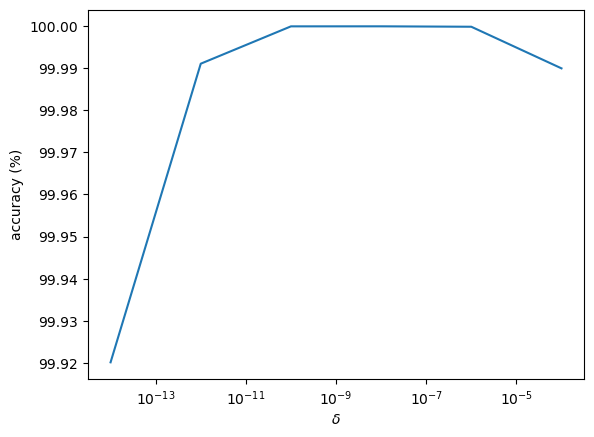

In [81]:
# accuracy as a function of delta
acc = np.array([calc_der(1, i)[1]-calc_der(1, i)[0] for i in deltas])*100

plt.plot(deltas, acc)
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('$\delta$')
plt.ylabel('accuracy (%)')

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt{1-x^2} {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$ th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [85]:
# a)

true_val = np.pi / 2

def f(x):
    b = (1-x**2)
    if b >= 0:
        return b**(1/2)
    else:
        return 0

def my_int(N):
    h = 2*N**(-1)
    a = [h*f(-1+h*k) for k in range(N)]
    return np.sum(a)

print("difference:", abs(true_val - my_int(100)))

difference: 0.0016620712456465458


In [ ]:
# b)

ns = [i for i in range(2,9)]

for n in ns:
    start_time = time.time()
    print("N =", n)
    print("difference:", abs(true_val - my_int(10**n)))
    print(f'computation time: {(time.time()-start_time):.2e} s')
    print('\n')

If the computation needs to be run in less than a second, N should be 10^6.